# Introduction

In this post we discuss the rectangle function (called "rect" function).  We use the rect function as a basis for the delta function in much the same way we used the Gaussian as a basis for the delta function.  We begin with a review of Euler' formula because we will need to recognize an identity of the sine function in our result. Next we  derive the Fourier transform of a simple rect. We discuss the squeeze thereom order to understand the limit of that function as the frequency approaches zero.  We then use the properties of Fourier transform to find the transform of a scalable rect, and finally we take the limit as the width of the rect approaches zero to show the relationship to a delta function.  

# Preliminary

Recall that Euler's formula states that 

$$e^{i \theta} = \cos \theta + i \sin \theta$$

*Incidentally, if you compute the first several terms of the Taylor series expansion for $e^\theta$, $\sin \theta$ and $\cos \theta$ you will better understand the motivations that led to the "discovery/development/invention" of complex numbers and the role of $i=\sqrt{-1}$. But perhaps that's another post.*

If we replace $i\theta$ with $-i\theta$:  

$$i\theta \rightarrow -i\theta$$

We have 

$$e^{-i\theta} = \cos(-\theta) + i \sin(-\theta)$$

The cosine function is even so $\cos(-\theta) = \cos \theta$. The sine function is odd so $\sin(-\theta) = -\sin \theta$.  Therefore 

$$e^{-i\theta} = \cos(\theta) - i \sin(\theta)$$


We substract the 2nd equation from the 1st.

$$e^{i \theta} = \cos \theta + i \sin \theta$$  

$$- e^{-i\theta} = -\cos(\theta) + i \sin(\theta)$$   

$$e^{i\theta} - e^{-i\theta} = 0 + 2i\sin \theta$$

Solving for $\sin \theta$ yields

$$\sin \theta = \frac{e^{i\theta} - e^{-i\theta}}{2i} $$

Later we need to recognize this idenity in our result.

# Rectangle function

The rectangle or rect function is described with the following.  

 $$f(x)= rect(x) = 
\begin{cases}
    1,& \text{if } |x|<\frac{1}{2}\\
    0,              & \text{otherwise}
\end{cases}$$

(-3.0, 3.0)

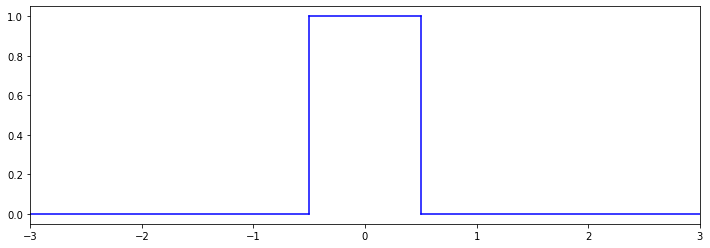

In [1]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,4))
ax.plot([-5, -1/2],[0,0], color = 'blue')
ax.plot([-1/2, -1/2], [0, 1], color='blue')
ax.plot([-1/2, 1/2], [1,1], color='blue')
ax.plot([1/2, 1/2], [0, 1] , color='blue')
ax.plot([1/2, 5], [0,0], color='blue')
ax.set_xlim(-3, 3)

#ax.arrow(0,0, 0, 1)

The graph above shows the rect function. For values $x<-\frac{1}{2}$ the function has the value zero, above $x=\frac{1}{2}$ the function has the value zero, and where $-\frac{1}{2} < x < \frac{1}{2}$ the function has the value one. 

# Fourier transform of rect(x)

We can determine the Fourier transform of the rect function directly using formula for Fourier transform. 

$$F(s) = \int \limits_{-\infty}^{\infty} f(x)~e^{-2 \pi i s x}~dx$$

The key to determining this integral is piecewise integation.  The function is zero everywhere except $-\frac{1}{2} < x< \frac{1}{2}$.  Therefore

$$F(s) = \int \limits_{-\infty}^{-\frac{1}{2}} (0)~e^{-2 \pi i s x}~dx + \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} (1) ~e^{-2 \pi i s x}~dx + \int \limits_{\frac{1}{2}}^{\infty} (0)~e^{-2 \pi i s x}~dx$$

$$F(s) = \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} ~e^{-2 \pi i s x}~dx$$

We use u substitution to solve the integral. Let $u = - 2 \pi i s x \Rightarrow du = -2 \pi i s ~dx \Rightarrow dx = \frac{du}{-2 \pi i s}$

making these substitions yield

$$F(s) = \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} ~e^{u}~\frac{du}{-2 \pi i s}= \frac{-1}{ 2 \pi i s} \Big[ e^{-2 \pi i s x} \Big]_{-\frac{1}{2}}^\frac{1}{2}$$

Evaluating the integral at its limits gives us 


$$F(s)  =\frac{-1}{ 2 \pi i s} \Big( e^{-\pi i s } - e^{\pi i s} \Big) = \frac{1}{ 2 \pi i s} \Big( e^{\pi i s } - e^{-\pi i s} \Big)$$

We group the $2i$ with the difference in exponentials

$$F(s) = \frac{1}{ \pi s} \frac{\Big( e^{\pi i s } - e^{-\pi i s} \Big)}{2i}$$


We then recognize that the difference in exponentials over $2i$ is the sine function:

$$F(s) = \frac{1}{\pi s} \sin \pi s $$

This function appears often enough to have its own name: sinc function.

$$F(s) = \frac{\sin \pi s}{\pi s}  = \text{sinc} ~\pi s$$

# Squeeze theorem

What is the limit of the sinc function as $s \rightarrow 0$?

$$\lim_{s \to 0} \frac{\sin \pi s}{\pi s} = ?$$

Text(0.5, 1.0, 'unit circle')

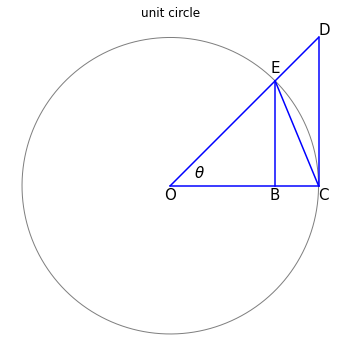

In [2]:
import numpy as np

fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.axis('off')
theta = np.linspace(0, 2*np.pi, num=500)
radius = 1
x = radius*np.cos(theta)
y = radius*np.sin(theta)
angle = np.pi/4
ax.plot(x, y, color='gray', lw=1)
ax.plot([0, radius], [0, 0], color='blue')
ax.plot([0, np.tan(angle)], color='blue')
ax.plot([1, 1], [0, np.tan(angle)], color='blue')
ax.plot([1, np.cos(angle)], [0, np.sin(angle)], color='blue')
ax.plot([np.cos(angle), np.cos(angle)], [0, np.sin(angle)], color='blue')
ax.text(0,-0.01, 'O', va='top', ha='center', fontsize=15)
ax.text(np.cos(angle),-0.01, 'B', va='top', ha='center', fontsize=15)
ax.text(1,-0.01, 'C', va='top', ha='left', fontsize=15)
ax.text(1, np.tan(angle), 'D', va='bottom', ha='left', fontsize=15)
ax.text(np.cos(angle), 1.05*np.sin(angle), 'E', va='bottom', ha='center', fontsize=15)

ax.text(0.2, 0.09, r'$\theta$', fontsize=15, ha='center', va='center')
ax.set_title('unit circle')

#https://tex.stackexchange.com/questions/346613/how-to-label-angles-in-a-right-triangle

The diagram above shows a unit circle with an angle $\theta$ indicated. We consider three areas.

1. $A_W$: The area of the wedge $OCE$ which consists of line segments $\overline{OC}$ and $\overline{OE}$ together with arc-segment $CE$
2. $A_I$: The area of the isoceles triangle $OCE$
3. $A_R$: The area of the right triangle $OCD$

By observation we can postion the areas from largest to smallest in the inequality

$$A_I \leq A_W \leq A_R$$

In general, the area of a triangle is one half the base times the height: $\frac{1}{2}bh$

For the isoceles triangle the area is 

$$A_I = \frac{1}{2}bh = \frac{1}{2}(1)(\sin \theta) = \frac{\sin \theta}{2}$$

The area of the right triangle is 

$$A_R= \frac{1}{2}bh = \frac{1}{2}(1) \tan \theta = \frac{\tan \theta}{2}$$

The area of the wedge is a portion of the total area of a circle.  That portion is $\frac{\theta}{2 \pi}$. Therefore the area of the wedge is 

$$A_W = \frac{\theta}{2 \pi} \pi r^2$$

The radius of the unit circle is $r=1$ so

$$A_W = \frac{\theta}{2} $$



We make these substitutions into our inequality to arrive at

$$A_I \leq A_W \leq A_R$$  

  

$$\frac{\sin \theta}{2} \leq \frac{\theta}{2} \leq \frac{\tan \theta}{2}$$  

Multiplying by 2 and substiting $\tan \theta = \frac{\sin \theta} {\cos \theta}$ gives us

$$\sin \theta \leq \theta \leq \frac{\sin \theta}{\cos \theta} $$

Next we divide by $\sin \theta$

$$1 \leq \frac{\theta}{\sin \theta} \leq \frac{1}{\cos \theta} $$

Taking the reciprocal yields

$$1 \geq \frac{\sin \theta}{\theta} \geq \cos \theta$$


Finally we take the limit as $\theta \rightarrow 0$

$$\lim_{\theta \to 0}1 \geq \lim_{\theta \to 0} \frac{\sin \theta}{\theta} \geq  \lim_{\theta \to 0}\cos \theta$$  

$$1 \geq \lim_{\theta \to 0} \frac{\sin \theta}{\theta} \geq  1$$

So the limit of the sinc function is a number that lies between one and one.  Therefore it must be one.  Hence the name "squeeze" theorem.   

$$ \lim_{\theta \to 0} \frac{\sin \theta}{\theta} = 1$$

QED

So far we have derived the Fourier of a rect

$$\text{rect}(x) \leftrightharpoons \text{sinc}(s)$$



Text(1, 0.8, '$\\frac{\\sin \\pi s}{\\pi s}$')

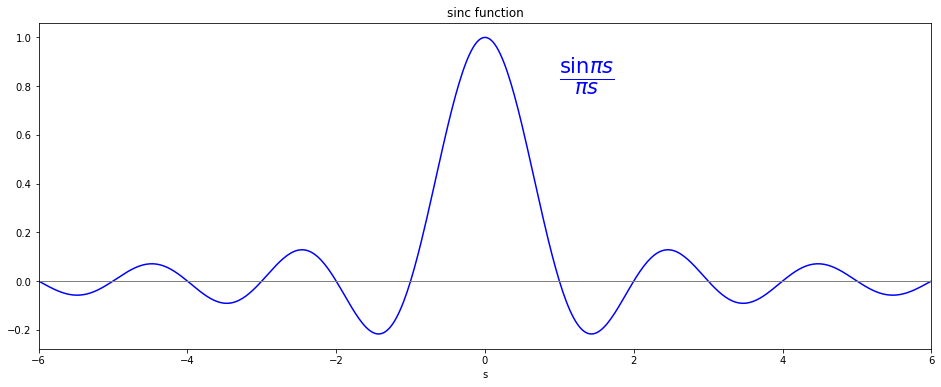

In [3]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set_title('sinc function')
r = 6
ax.set_xlim(-r,r)
ax.set_xlabel('s')
s = np.linspace(-r, r, num=500)
y = np.sin(np.pi*s)/np.pi/s
ax.plot(s,y, color='blue')
ax.axhline(0, color='gray', lw=1)
ax.text(1, 0.8, r'$\frac{\sin \pi s}{\pi s}$', fontsize=30, color='blue')

The graph above shows a sinc function.  We have shown with the squeezze theorem that the value at $s=0$ is one.  The sinc function has a value of zero for values of $s = \pm 1, ~ \pm 2, ~\pm 3, ~...$.  This is because the sine function has values of zero at $n \pi$ where $n = \pm 1, ~ \pm 2, ~\pm 3, ~...$

Next we will use the properties of Fourier transform to determine the Fourier transform of a scalable rect function.


# Scalable rect function

 $$f(x)= \frac{1}{w} \text{rect}  \Big( \frac{x}{w} \Big) = 
\begin{cases}
    \frac{1}{w},& \text{if} |\frac{x}{w}|<\frac{1}{2}\\
    0,              & \text{otherwise}
\end{cases}$$

The scalable rect function differs in two ways from the unit rect function.  

1. The width is $w$ rather than one.  
2. The height is $\frac{1}{w}$ rather than one.  

What they have in common is that the area under the curve is one. i.e. the height times the width is one, $\frac{1}{w} w = 1$.  This is important when applying mathmetics to the physical world.  It allows us to model the world with equations that perserve the law of conservation of energy. 

To determine the Fourier transform of $\frac{1}{w} \text{rect}\Big(\frac{x}{w}\Big)$ we begin with 

$$\text{rect}(x) \leftrightharpoons \text{sinc}(s)$$


From the linearity property we 

$$\frac{1}{w} ~\text{rect}(x) \leftrightharpoons \frac{1}{w} ~\text{sinc}(\pi s)$$

Applying the similarity theorem (scaling property) to the equation above yields

$$\frac{1}{w} \text{rect} \Big(\frac{x}{w} \Big) \leftrightharpoons \frac{w}{w} \text{sinc}( \pi w s) = \text{sinc}( \pi w s)$$

# Relating the rect function to the delta function

We can easily show that the scalable rect function $\frac{1}{w} \text{rect}\Big(\frac{x}{w} \Big)$ has an area under the curve of one for an arbitraily small $w$.  As $w \rightarrow 0$ the height of the rect approachs infinity. Therefore the scalable rect function has the characteristics needed for a delta.  

We now apply the limit as $w \rightarrow 0$.  

$$\lim_{w \to 0} \text{sinc} (\pi w s ) = 1$$

as we saw previously with the squeeze theorem.  Therefore 

$$\delta(x) \leftrightharpoons 1$$

QED


# Summary 

The Fourier transform of a rect is a sinc.  The delta "function" can we thought of as a rect of infintesimal width.  The sinc function goes to one as $s$ goes to zero. Therefore the Fourier transform of a delta is one.  We see that a delta function is an impulse of infintesimal width, but while it has infinite height, it has a finite area under the curve.  It can impart a specific amount of energy to a system instantaneously.  Of course this is an approximation but it is a useful and accurate approximation in many circumstances.    